In [1]:
import torch
import transformers
import pandas as pd


### Raw Text Data

In [2]:
from data_cleaner import DataCleaner


In [5]:
df_text = pd.read_csv("data/[DEIDENTIFIED]OACIS_RadiologyReport_20241024.csv", usecols=["MRN", "ReportDate", "ServDescription", "ReportText"])
df_text.rename(columns={"MRN": "pt_shsc_id"}, inplace=True)
df_text["ReportDate"] = pd.to_datetime(df_text["ReportDate"])

df_text = DataCleaner().clean_data(df_text)

Cleaning ReportText: 100%|██████████| 29498/29498 [00:00<00:00, 47894.14it/s]


In [11]:
# `report_data` stores patient fracture labels (fracture, no fracture) and other results.
df_labels = pd.read_csv("data/Osteosarc_Rad_Report_Data_Oct_7.csv", usecols=[
	"pt_shsc_id",
	"imaging_date",
	'image_ct___1', 
	'image_ct___2', 
	'image_ct___3',
])
df_labels["imaging_date"] = pd.to_datetime(df_labels["imaging_date"], errors='coerce')

df_labels.rename(columns={
	"image_ct___1": "fracture",
	"image_ct___2": "metastases",
	"image_ct___3": "healthy"
}, inplace=True)

df_labels["fracture_or_metastases"] = df_labels["fracture"] + df_labels["metastases"]
df_labels["fracture_or_metastases"] = df_labels["fracture_or_metastases"].apply(lambda x: min(x, 1))
df_labels.drop(columns=["fracture", "metastases"], inplace=True)

In [12]:
df_labels.dropna(inplace=True)
df_labels

,pt_shsc_id,imaging_date,healthy,fracture_or_metastases
6,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2009-09-18,1.0,0.0
7,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2010-01-13,1.0,0.0
8,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2010-01-20,0.0,0.0
9,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2010-10-28,0.0,1.0
10,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2011-02-02,1.0,0.0
...,...,...,...,...
2321,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2010-11-17,0.0,0.0
2322,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2010-11-26,1.0,0.0
2323,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2011-08-24,0.0,1.0
2324,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2012-01-27,1.0,0.0


In [13]:
df_joined = pd.merge(df_labels, df_text, how='left', on='pt_shsc_id')
df_joined

,pt_shsc_id,imaging_date,healthy,fracture_or_metastases,ServDescription,ReportDate,ReportText
0,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2009-09-18,1.0,0.0,Bone Scan(Whole Body)Nuc Med,2012-06-08 11:21:32.000,technetium mdp bone scan whole body: history:p...
1,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2009-09-18,1.0,0.0,Abdomen + Pelvis CT with oral C+,2011-04-12 16:27:57.000,ct abdomen pelvis (enhanced) comparison: ct da...
2,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2009-09-18,1.0,0.0,Abdomen + Pelvis CT with oral C+,2011-08-04 16:16:40.000,ct abdomen pelvis (enhanced) comparison: ct da...
3,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2009-09-18,1.0,0.0,Bone Scan(Whole Body)Nuc Med,2011-07-29 16:59:24.000,"technetium mdp bone scan comparison: june 6, 2..."
4,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2009-09-18,1.0,0.0,X-Ray Thoracic Spine,2012-06-27 09:23:01.000,thoracic spine comparison study: 6/19/2012 pos...
...,...,...,...,...,...,...,...
60174,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2012-08-22,0.0,1.0,Bone Mass Density High Risk - Multiple Sites,2010-11-18 13:18:00.140,bone densitometry (dxa): a bone density study ...
60175,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2012-08-22,0.0,1.0,Bone Scan Whole Body+Extra Views+Flow,2010-11-19 19:24:00.140,technetium mdp whole body bone scan comparison...
60176,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2012-08-22,0.0,1.0,Kidney + Bladder US,2012-01-27 18:48:44.000,findings: right nephrostomy tube in situ. mark...
60177,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2012-08-22,0.0,1.0,CT chest,2012-08-22 14:27:14.000,ct chest provided history: 69 yo male. post en...


In [14]:
df_filtered = df_joined[abs(df_joined['ReportDate'] - df_joined['imaging_date']).dt.days <= 2]
df_filtered

,pt_shsc_id,imaging_date,healthy,fracture_or_metastases,ServDescription,ReportDate,ReportText
147,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2010-01-20,0.0,0.0,Bone Mass Density High Risk - Multiple Sites,2010-01-21 11:39:00.140,bone densitometry (dxa): a baseline bone densi...
260,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2011-02-02,1.0,0.0,Bone Scan(Whole Body)Nuc Med,2011-02-02 16:24:11.000,technetium mdp bone scan findings: there is a ...
272,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2011-02-02,1.0,0.0,X-Ray Chest PA+LAT Routine,2011-02-02 09:12:24.000,chest pa and lateral reference:no previous the...
311,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2011-04-11,0.0,1.0,Abdomen + Pelvis CT with oral C+,2011-04-12 16:27:57.000,ct abdomen pelvis (enhanced) comparison: ct da...
389,SHSC-1AR4W-5L54C-ITDX3-TF89XE1YWW-ZKFBG-9VWKC-...,2011-06-06,0.0,1.0,Abdomen + Pelvis CT with oral C+,2011-06-06 15:08:04.000,ct abdomen pelvis (enhanced) comparison: ct da...
...,...,...,...,...,...,...,...
60124,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2012-01-27,1.0,0.0,Nephrostomy or NUT change,2012-01-27 13:15:45.000,right nephrostomy catheter exchange history: u...
60138,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2012-01-27,1.0,0.0,Kidney + Bladder US,2012-01-27 18:48:44.000,findings: right nephrostomy tube in situ. mark...
60158,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2012-08-22,0.0,1.0,Abdomen + Pelvis CT with oral C-,2012-08-23 10:57:52.000,ct abdomen and pelvis volumetric ct images hav...
60172,SHSC-ZT1YP-WP8FY-45FV0-HFN9E2J3E8-50SNT-5PP8Q-...,2012-08-22,0.0,1.0,Bone Scan Whole Body+Extra Views+Flow,2012-08-22 15:04:50.000,technetium mdp bone scan whole body: history:p...


In [15]:
# SAVE TO CSV - to be used by classifier 
df_filtered.to_csv("data/reports_filtered.csv")

In [8]:
print("All elements are datetime:", df_labels['imaging_date'].apply(lambda x: isinstance(x, pd.Timestamp)).all())
print("All elements are datetime:", df_text['ReportDate'].apply(lambda x: isinstance(x, pd.Timestamp)).all())

All elements are datetime: True
All elements are datetime: True


In [9]:
print(df_filtered.iloc[2].ReportText)
print("healthy:", df_filtered.iloc[1].healthy)
print("fracture: ", df_filtered.iloc[1].fracture_or_metastases)

chest pa and lateral reference:no previous the cardiac silhouette, mediastinal and hilar structures are within normal limits. the lungs and pleural spaces are clear. _____________ [deidentified - doctor's info]
healthy: 1.0
fracture:  0.0


In [10]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained BERT model
model = SentenceTransformer('pritamdeka/S-PubMedBert-MS-MARCO')


In [11]:
report = df_filtered.iloc[3].ReportText

In [19]:
df_filtered.columns

Index(['pt_shsc_id', 'imaging_date', 'healthy', 'fracture_or_metastases',
       'ServDescription', 'ReportDate', 'ReportText'],
      dtype='object')

In [44]:
from sklearn.naive_bayes import BaseEstimator

In [34]:
bench_positive = "Upon examining the patient, it is evident that there are clear signs of a fracture. Radiographic imaging reveals a distinct break in the continuity of the bone, confirming the presence of a fracture. The patient reported acute pain in the affected area, accompanied by swelling and limited mobility, which are typical symptoms associated with bone fractures. Furthermore, physical examination corroborates the imaging findings, as there is noticeable tenderness and deformity at the site of the injury. The fracture diagnosis is further supported by the patient's medical history and the nature of the trauma experienced. Consequently, the medical team has concluded that the patient indeed has a fracture, and appropriate treatment protocols, including immobilization and potential surgical intervention, will be initiated."
bench_negative = "After a thorough evaluation, it has been determined that the patient does not have a fracture. Multiple diagnostic assessments, including physical examination and imaging studies such as X-rays, show no evidence of any break or discontinuity in the bone structure. The patient's complaints of discomfort appear to be related to soft tissue injury rather than a skeletal issue. Additionally, there is no swelling, tenderness, or deformity typically associated with fractures. The imaging results are clear, and the radiologist has confirmed the absence of any fractures. Based on these findings, the medical team has confidently ruled out the presence of a fracture, and the patient will be treated accordingly for soft tissue healing without the need for fracture-specific interventions."

bench_positive = "THERE IS A FRACTURE."
bench_negative = "THERE IS NO FRACTURE. HEALTHY. No evidence of fracture."



In [35]:
positive_vector = model.encode(bench_positive)
negative_vector = model.encode(bench_negative)
report_vector = model.encode(report)

print(report_vector.shape)
print(negative_vector.shape)
print(positive_vector.shape)

# Ensure they are numpy arrays
import numpy as np
report_vector = np.asarray(report_vector)
positive_vector = np.asarray(positive_vector)
negative_vector = np.asarray(negative_vector)

(768,)
(768,)
(768,)


In [31]:
from numpy import dot
from numpy.linalg import norm

# Cosine similarity calculation
def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

print(f"Fracture Similarity: {cosine_similarity(report_vector, positive_vector)}")
print(f"Healthy Similarity: {cosine_similarity(report_vector, negative_vector)}")


Fracture Similarity: 0.8604776263237
Healthy Similarity: 0.8519762754440308


In [36]:
print(f"Similarity: {cosine_similarity(negative_vector, positive_vector)}")

Similarity: 0.9257145524024963


In [32]:
def cosine_sim_positive(embedding):
    return cosine_similarity(embedding, positive_vector)
def cosine_sim_negative(embedding):
    return cosine_similarity(embedding, negative_vector)

def calculate_accuracy(df):
    new_df = pd.DataFrame()
    new_df['embeddings'] = df['ReportText'].apply(model.encode)
    new_df['positive'] = new_df['embeddings'].apply(cosine_sim_positive)
    new_df['negative'] = new_df['embeddings'].apply(cosine_sim_negative)
    new_df['prediction'] = new_df['positive'] > new_df['negative']
    new_df['actual'] = df['fracture_or_metastases']
    return new_df

new_df = calculate_accuracy(df_filtered)

In [37]:
new_df.to_csv("../embeddings_and_labels.csv")

In [33]:
print("Dataset size:", len(new_df))
print(sum(new_df['prediction'] == 1)) # 1 == has fracture
print(sum(new_df['actual'] == 1.0))
print("Prediction accuracy:")
print(sum(new_df['prediction'] == new_df['actual']) / len(new_df))
new_df

Dataset size: 1367
1257
946
Prediction accuracy:
0.6495976591075348


,embeddings,positive,negative,prediction,actual
147,"[-0.33497125, -0.47956622, -0.4402823, -0.6257...",0.863554,0.854081,True,0.0
260,"[-0.34312877, -0.3783418, -0.49000645, -0.8716...",0.873850,0.857887,True,0.0
272,"[-0.5484336, -0.8523658, -0.59403175, -0.75100...",0.826128,0.830336,False,0.0
311,"[-0.19089755, -0.4133848, -0.5252129, -0.60152...",0.860478,0.851976,True,1.0
389,"[-0.23889565, -0.4590359, -0.5161861, -0.63725...",0.855262,0.847681,True,1.0
...,...,...,...,...,...
60124,"[-0.32535365, -0.37621447, -0.7107204, -0.4693...",0.822588,0.811829,True,0.0
60138,"[-0.22422041, -0.24311726, -0.52857274, -0.633...",0.836755,0.826575,True,0.0
60158,"[-0.22633597, -0.40881902, -0.6737913, -0.5509...",0.837487,0.826405,True,1.0
60172,"[-0.42077234, -0.5009113, -0.44316664, -0.5383...",0.859550,0.846019,True,1.0


In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


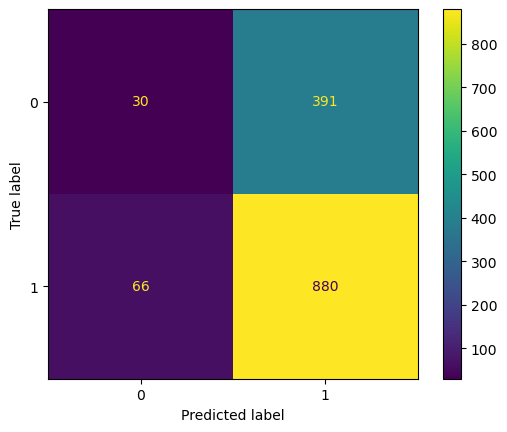

In [28]:
y_true = new_df['actual']
y_pred = new_df['prediction']
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()